In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas 
dataset = pandas.read_csv("../input/train.csv") 
dataset_test = pandas.read_csv("../input/test.csv")
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)
print(dataset.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9   ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B   ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B   ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B   ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B   ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  

In [2]:
print(dataset.shape)
dataset = dataset.iloc[:,1:]


(188318, 132)


In [3]:
print(dataset.describe())


               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

In [4]:
print(dataset.skew())


cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [5]:
import numpy

#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#range of features considered
split = 116 

#number of features considered
size = 15

data=dataset.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

#Ploatting 
n_cols = 2
n_rows = 7

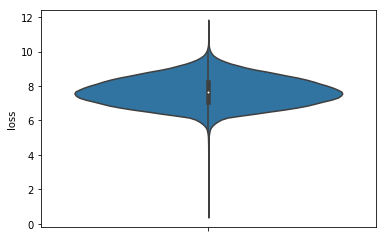

In [6]:
#log1p function applies log(1+x) to all elements of the column
dataset["loss"] = numpy.log1p(dataset["loss"])
#visualize the transformed column
sns.violinplot(data=dataset,y="loss")  
plt.show()

In [7]:
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


In [8]:
cols = dataset.columns
import pandas

#cat1 to cat116 have strings. The ML algorithms we are going to study require numberical data
#One-hot encoding converts an attribute to a binary vector

#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(0,split):
    train = dataset[cols[i]].unique()
    test = dataset_test[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

del dataset_test

#Import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset.iloc[:,i])
    feature = feature.reshape(dataset.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

#Concatenate encoded attributes with continuous attributes
dataset_encoded = numpy.concatenate((encoded_cats,dataset.iloc[:,split:].values),axis=1)
del cats
del feature
del dataset
del encoded_cats
print(dataset_encoded.shape)

(188318, 1176)
(188318, 1191)


In [9]:
#get the number of rows and columns
r, c = dataset_encoded.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = dataset_encoded[:,0:(c-1)]
Y = dataset_encoded[:,(c-1)]
del dataset_encoded

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y

#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

c:\program files\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


All 1279.201131298309


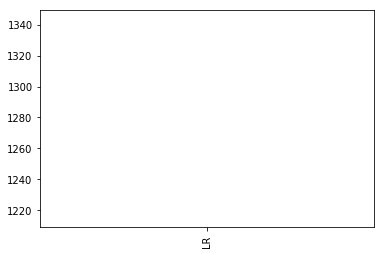

In [10]:
#Evaluation of various combinations of LinearRegression

#Import the library
from sklearn.linear_model import LinearRegression

#uncomment the below lines if you want to run the algo
#Set the base model
model = LinearRegression(n_jobs=-1)
algo = "LR"
#
##Accuracy of the model using all features
for name,i_cols_list in X_all:
   model.fit(X_train[:,i_cols_list],Y_train)
   result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
   mae.append(result)
   print(name + " %s" % result)
comb.append(algo)
   

##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

In [11]:
# Adding score to the list 
mae.append(1279.201131298309)
comb.append("LR" ) 

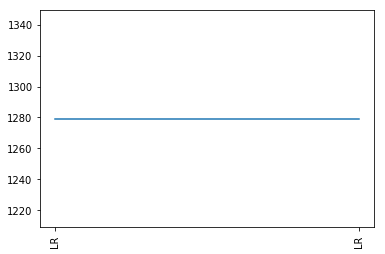

In [12]:
from sklearn.linear_model import Ridge

#Add the alpha value to the below list if you want to run the algo
a_list = numpy.array([])

for alpha in a_list:
    #Set the base model
    model = Ridge(alpha=alpha,random_state=seed)
    
    algo = "Ridge"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )

    
#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is 1267 with alpha=1

In [13]:
#Result obtained by running the algo for alpha=1.0    
if (len(a_list)==0):
    mae.append(1267.5)
    comb.append("Ridge" + " %s" % 1.0 )    

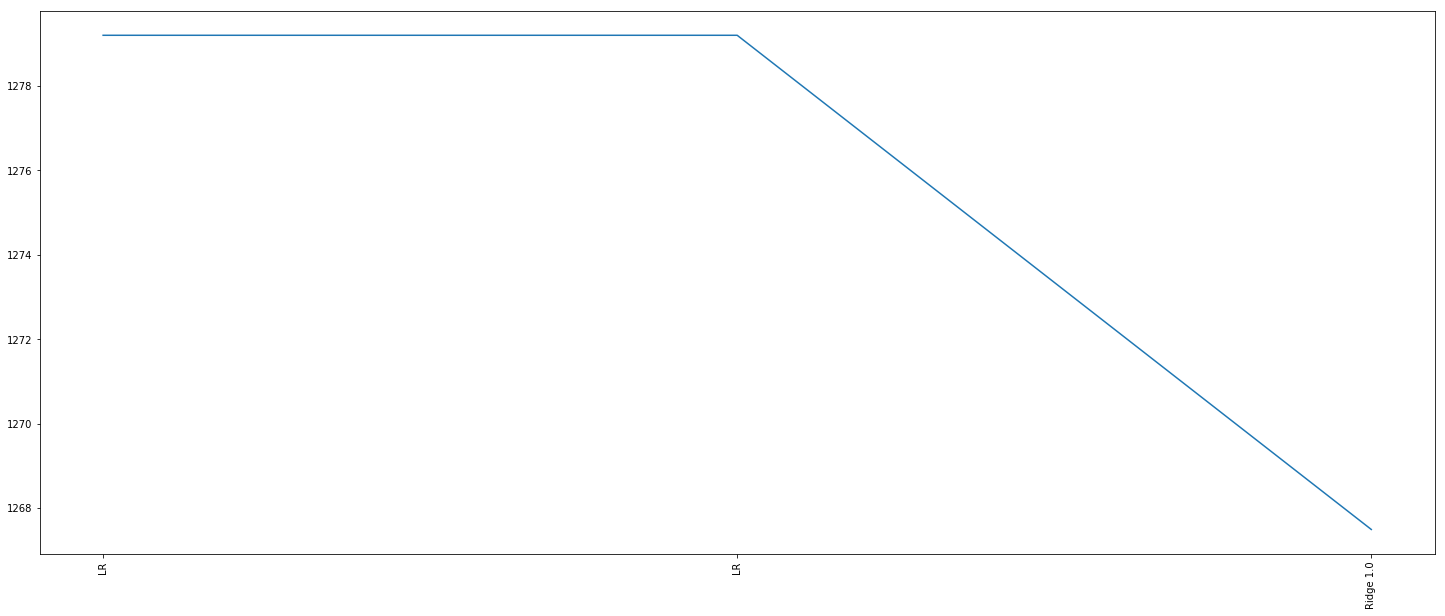

In [14]:
from sklearn.linear_model import Lasso

#Add the alpha value to the below list if you want to run the algo
a_list = numpy.array([])

for alpha in a_list:
    #Set the base model
    model = Lasso(alpha=alpha,random_state=seed)
    
    algo = "Lasso"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    



In [15]:
#Best estimated performance is 1262.5 for alpha = 0.001
#Result obtained by running the algo for alpha=0.001    
if (len(a_list)==0):
    mae.append(1262.5)
    comb.append("Lasso" + " %s" % 0.001 )

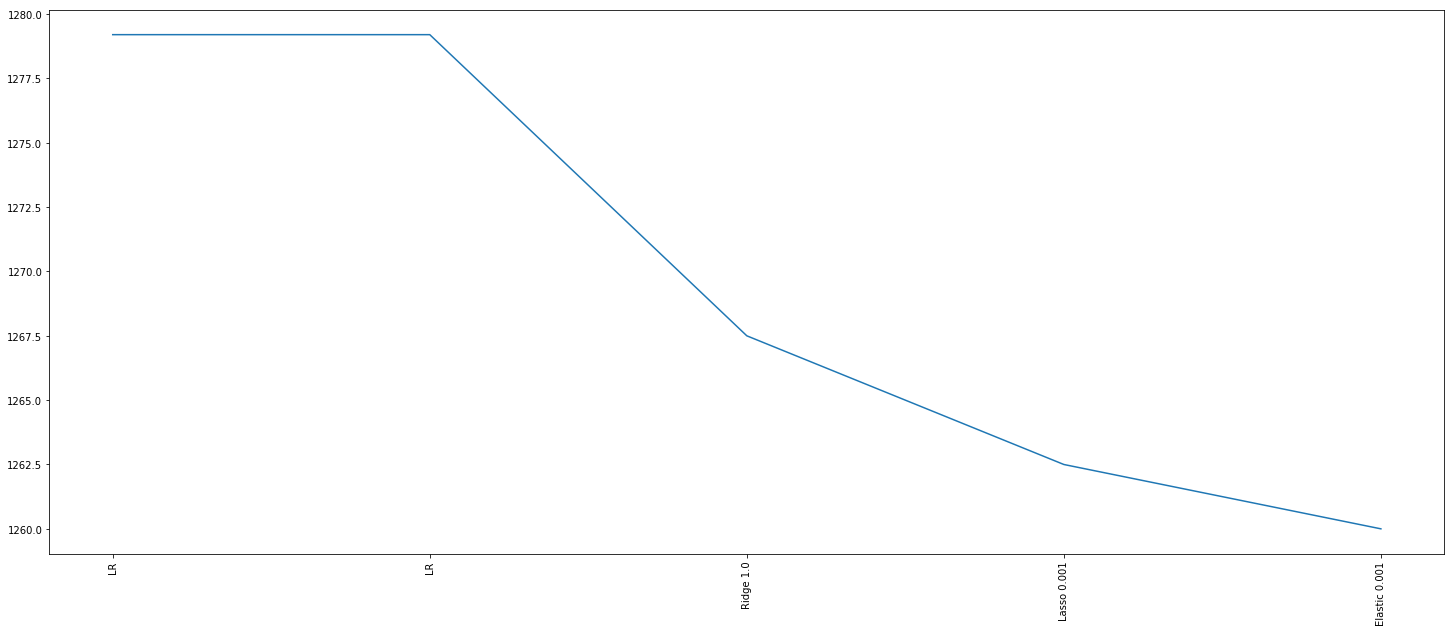

In [16]:
from sklearn.linear_model import ElasticNet

#Add the alpha value to the below list if you want to run the algo
a_list = numpy.array([])

for alpha in a_list:
    #Set the base model
    model = ElasticNet(alpha=alpha,random_state=seed)
    
    algo = "Elastic"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % alpha )

if (len(a_list)==0):
    mae.append(1260)
    comb.append("Elastic" + " %s" % 0.001 )
    
##Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    


In [17]:
if (len(a_list)==0):
    mae.append(1260)
    comb.append("Elastic" + " %s" % 0.001 )
    

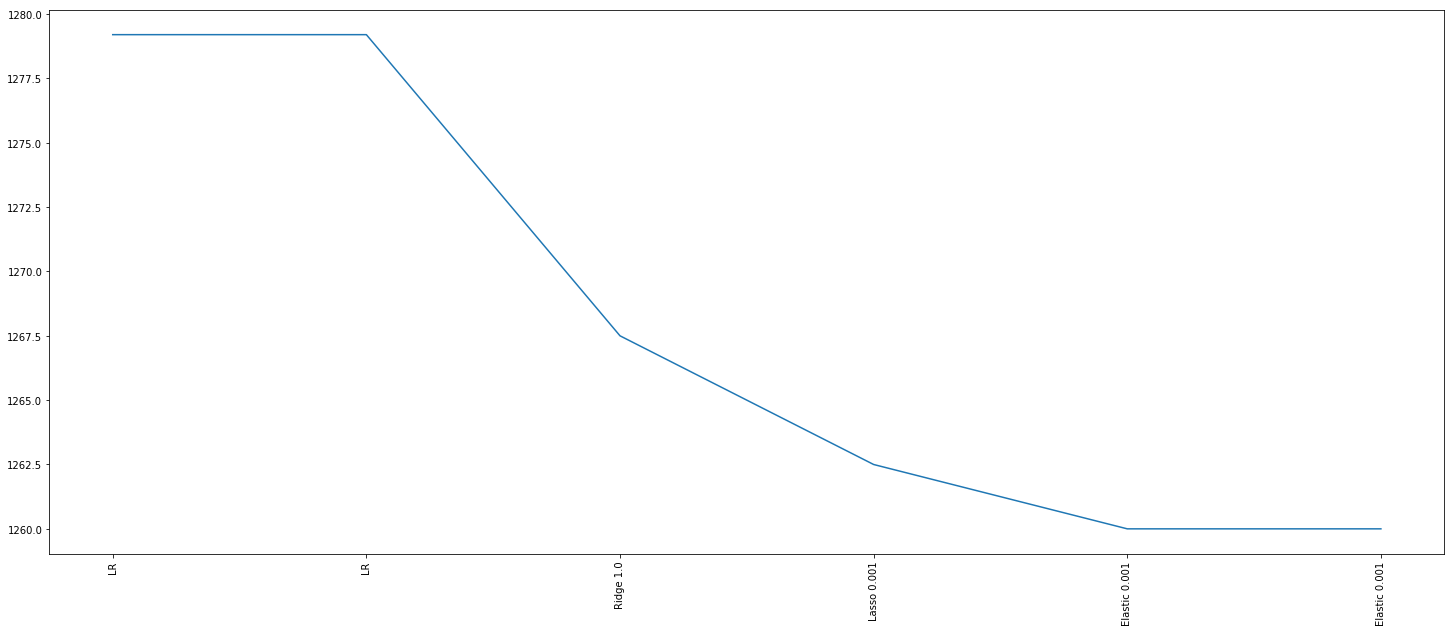

In [18]:
from sklearn.neighbors import KNeighborsRegressor

#Add the N value to the below list if you want to run the algo
n_list = numpy.array([])

for n_neighbors in n_list:
    #Set the base model
    model = KNeighborsRegressor(n_neighbors=n_neighbors,n_jobs=-1)
    
    algo = "KNN"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_neighbors )


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    


In [19]:
if (len(n_list)==0):
    mae.append(1745)
    comb.append("KNN" + " %s" % 1 )
    

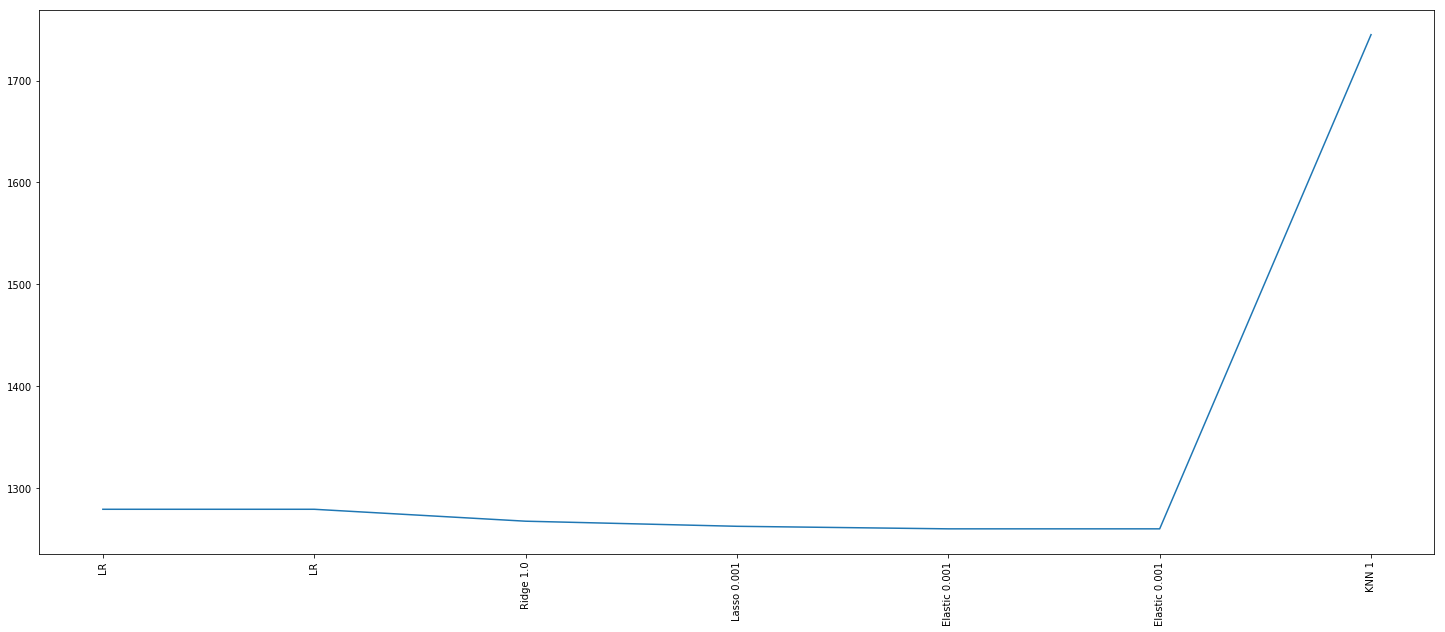

In [20]:
from sklearn.tree import DecisionTreeRegressor

#Add the max_depth value to the below list if you want to run the algo
d_list = numpy.array([])

for max_depth in d_list:
    #Set the base model
    model = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
    
    algo = "CART"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % max_depth )
  
    
#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    


In [21]:

if (len(a_list)==0):
    mae.append(1741)
    comb.append("CART" + " %s" % 5 )  

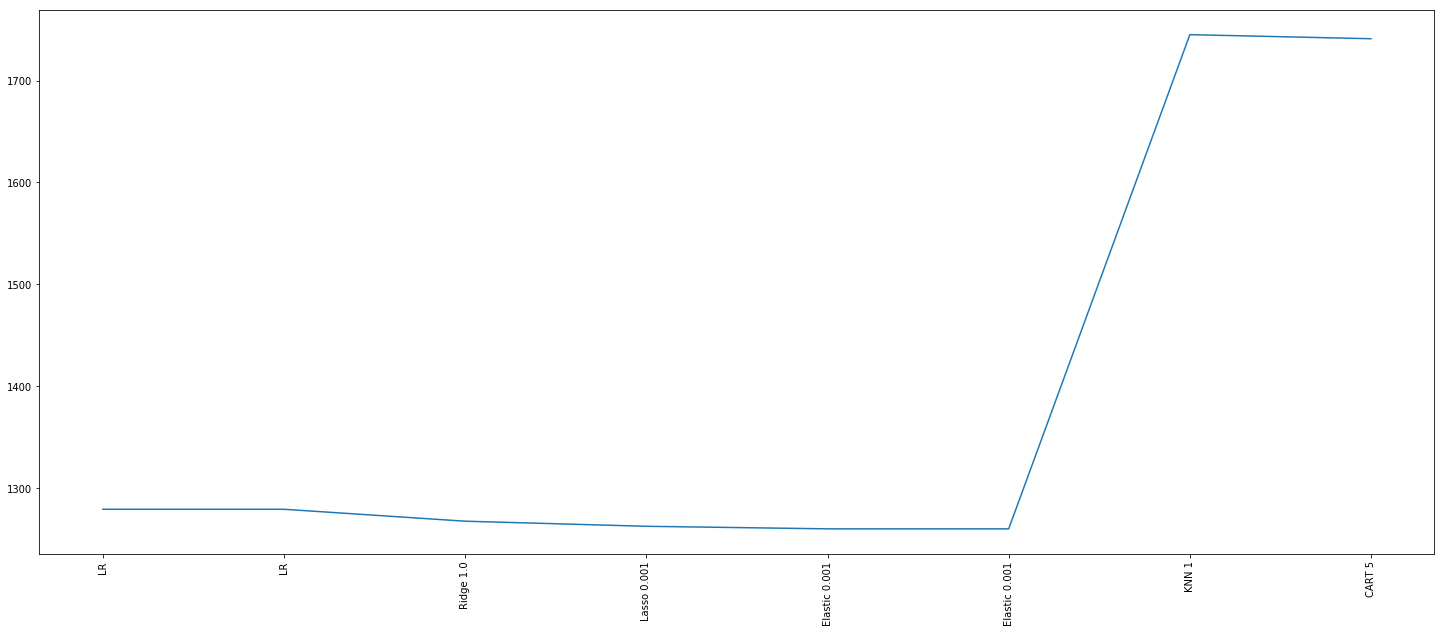

In [22]:
from sklearn.svm import SVR

#Add the C value to the below list if you want to run the algo
c_list = numpy.array([])

for C in c_list:
    #Set the base model
    model = SVR(C=C)
    
    algo = "SVM"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % C )

#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    



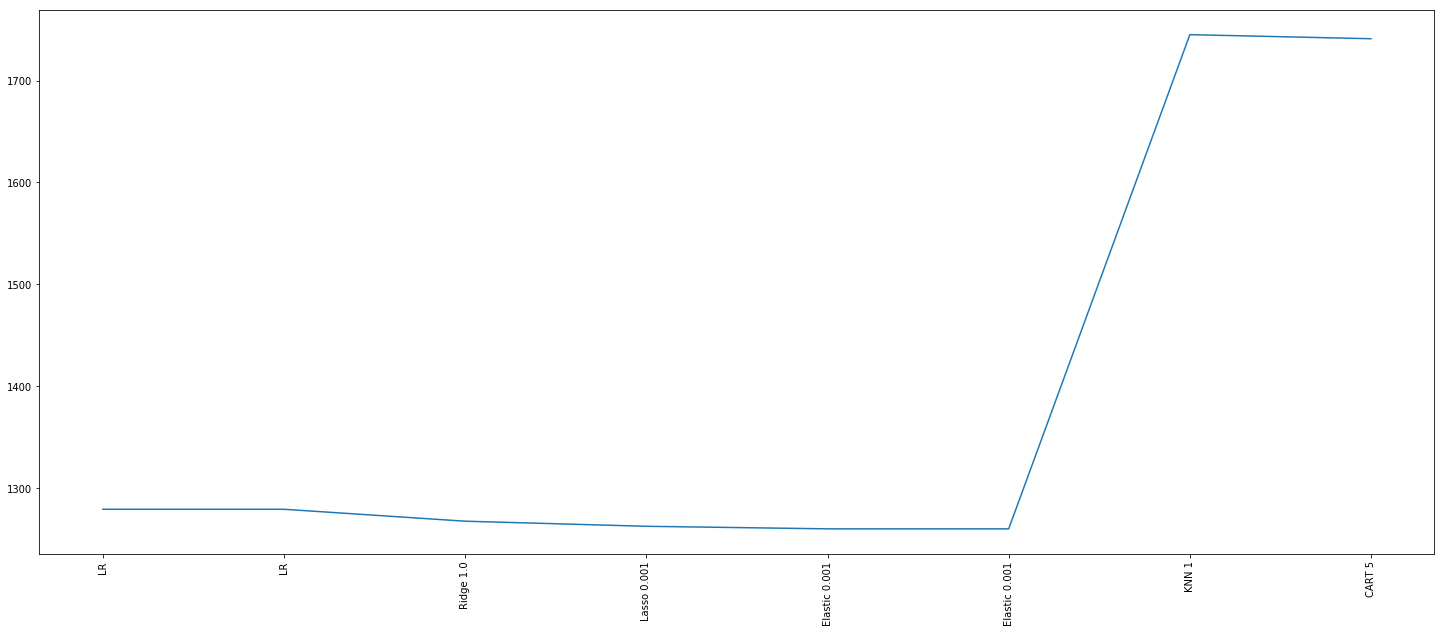

In [23]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = BaggingRegressor(n_jobs=-1,n_estimators=n_estimators)
    
    algo = "Bag"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )

##Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

#very high computation time

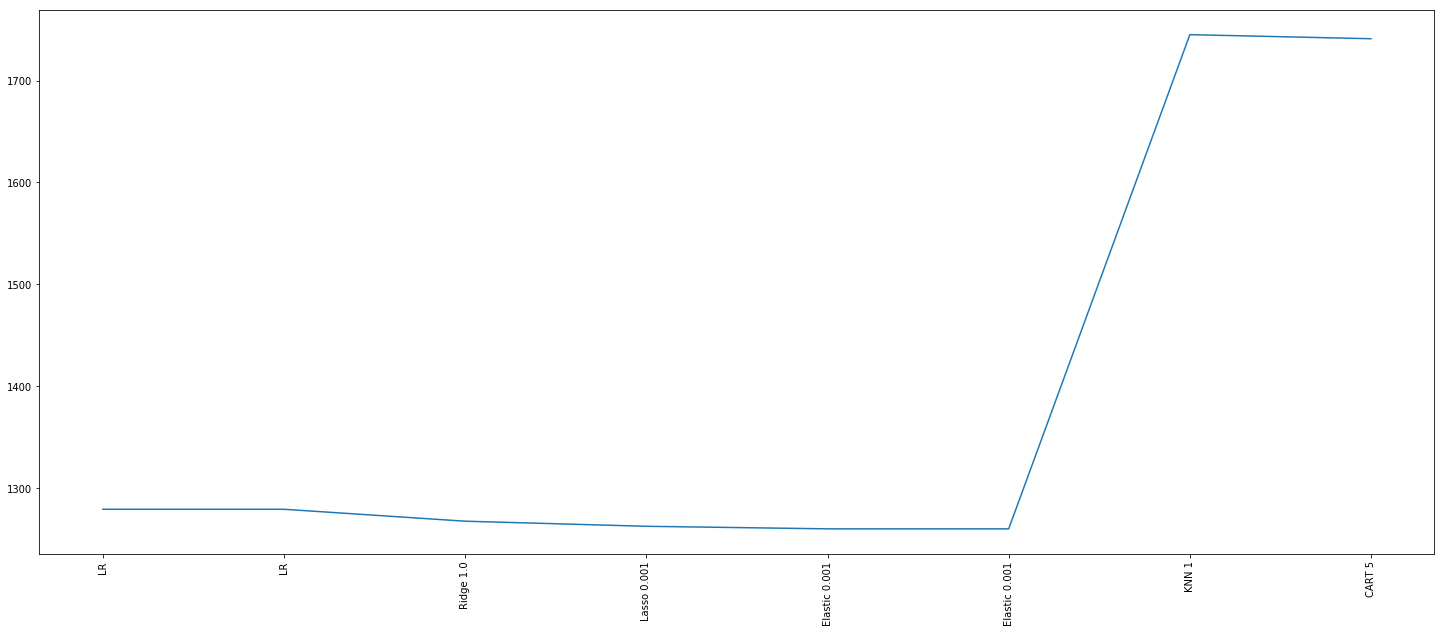

In [24]:
from sklearn.ensemble import RandomForestRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
    
    algo = "RF"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is 1213 when the number of estimators is 50

In [25]:
if (len(n_list)==0):
    mae.append(1213)
    comb.append("RF" + " %s" % 50 )    
    

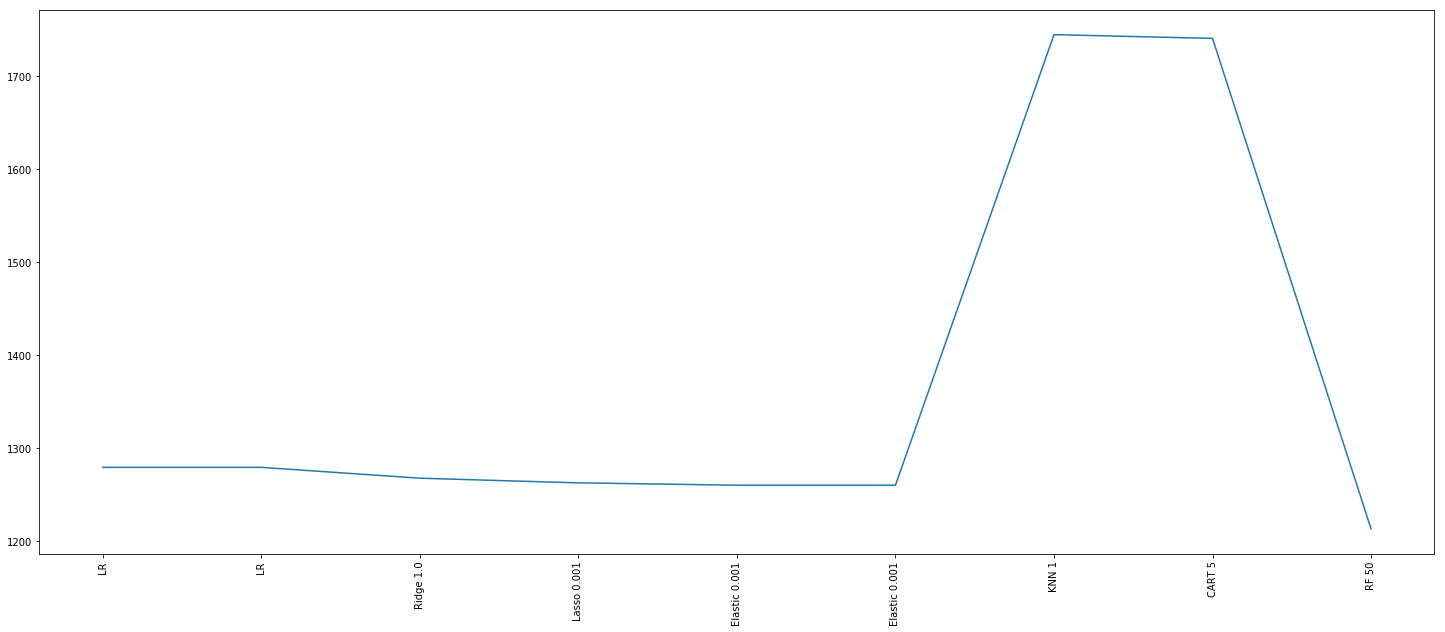

In [26]:
from sklearn.ensemble import ExtraTreesRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = ExtraTreesRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
    
    algo = "ET"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is 1254 for 100 estimators

In [27]:
if (len(n_list)==0):
    mae.append(1254)
    comb.append("ET" + " %s" % 100 )    
    

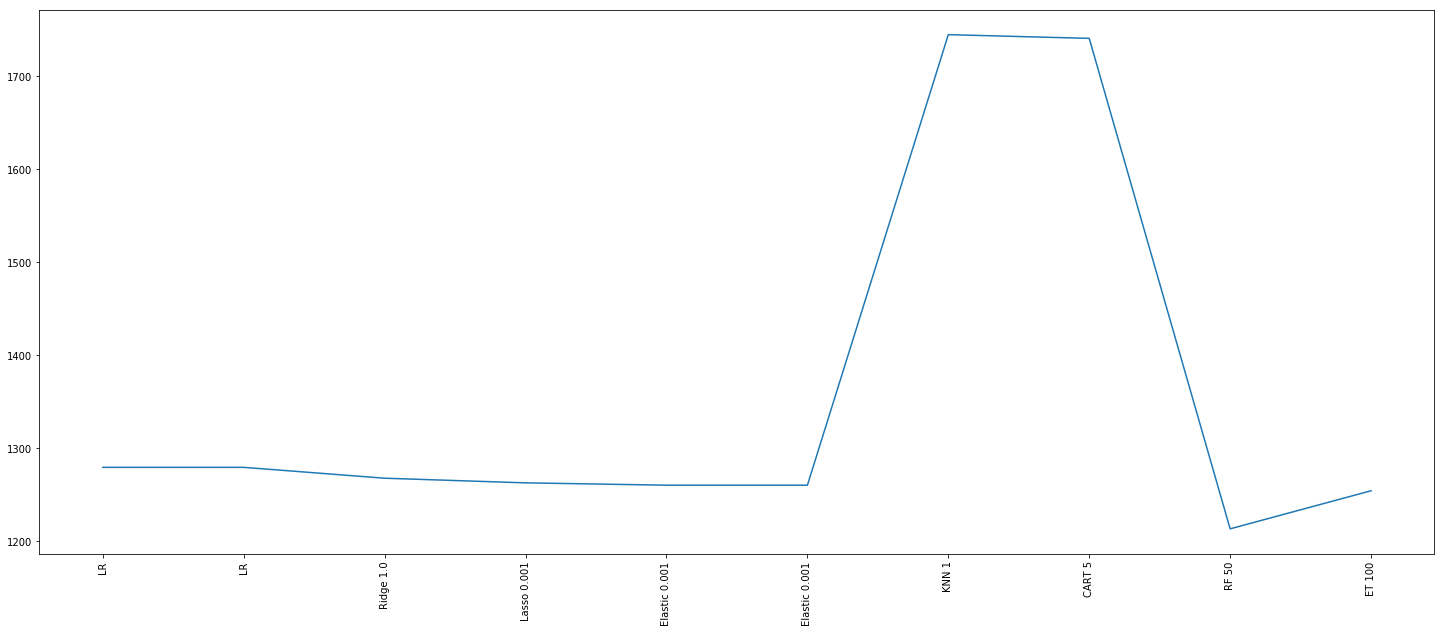

In [28]:
from sklearn.ensemble import AdaBoostRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = AdaBoostRegressor(n_estimators=n_estimators,random_state=seed)
    
    algo = "Ada"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is 1678 with n=100

In [29]:
if (len(n_list)==0):
    mae.append(1678)
    comb.append("Ada" + " %s" % 100 )    
    

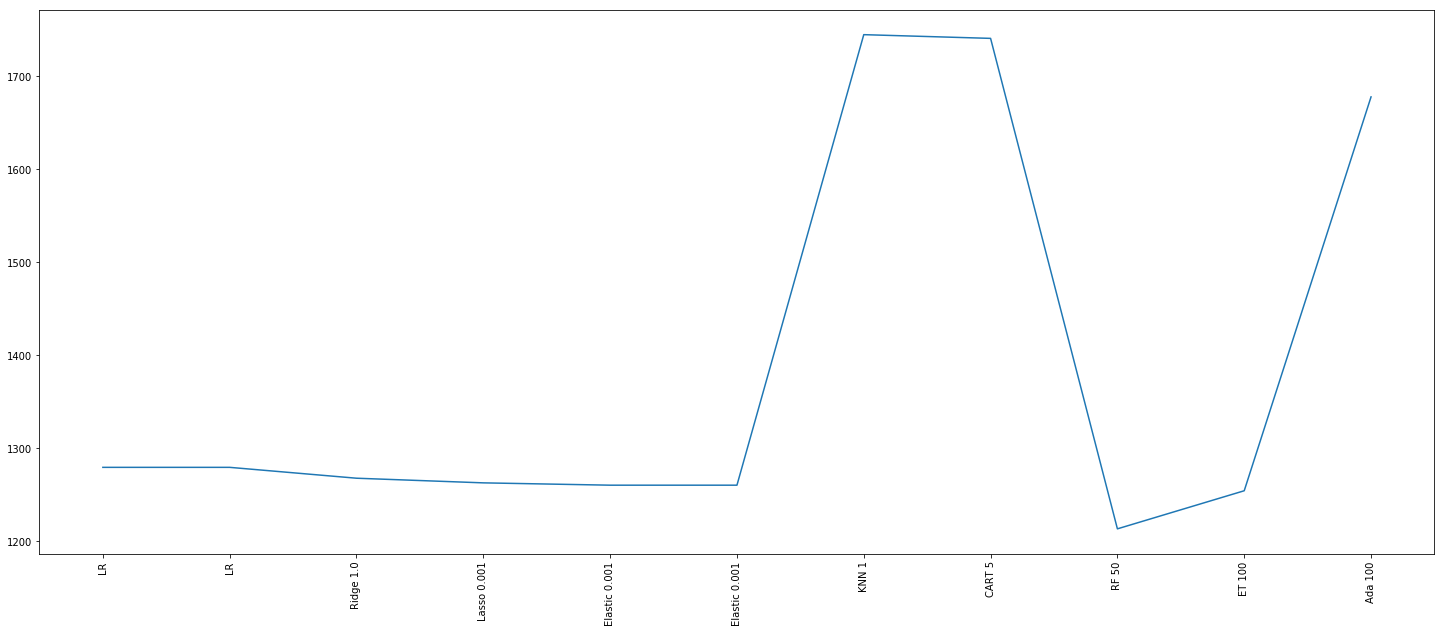

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = GradientBoostingRegressor(n_estimators=n_estimators,random_state=seed)
    
    algo = "SGB"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    



In [31]:
if (len(n_list)==0):
    mae.append(1278)
    comb.append("SGB" + " %s" % 50 )    
    

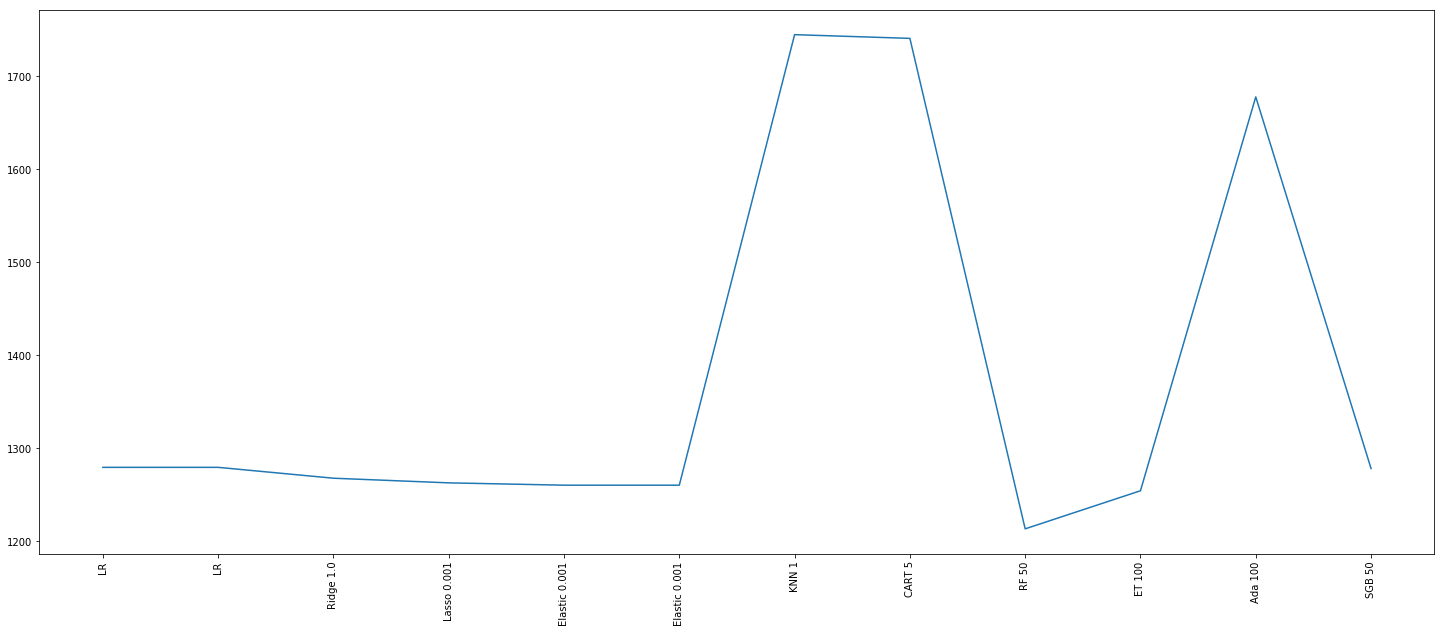

In [32]:
#Import the library
from xgboost import XGBRegressor

#Add the n_estimators value to the below list if you want to run the algo
n_list = numpy.array([])

for n_estimators in n_list:
    #Set the base model
    model = XGBRegressor(n_estimators=n_estimators,seed=seed)
    
    algo = "XGB"

    #Accuracy of the model using all features
    for name,i_cols_list in X_all:
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo + " %s" % n_estimators )


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    



In [33]:
if (len(n_list)==0):
    mae.append(1169)
    comb.append("XGB" + " %s" % 1000 )    
    

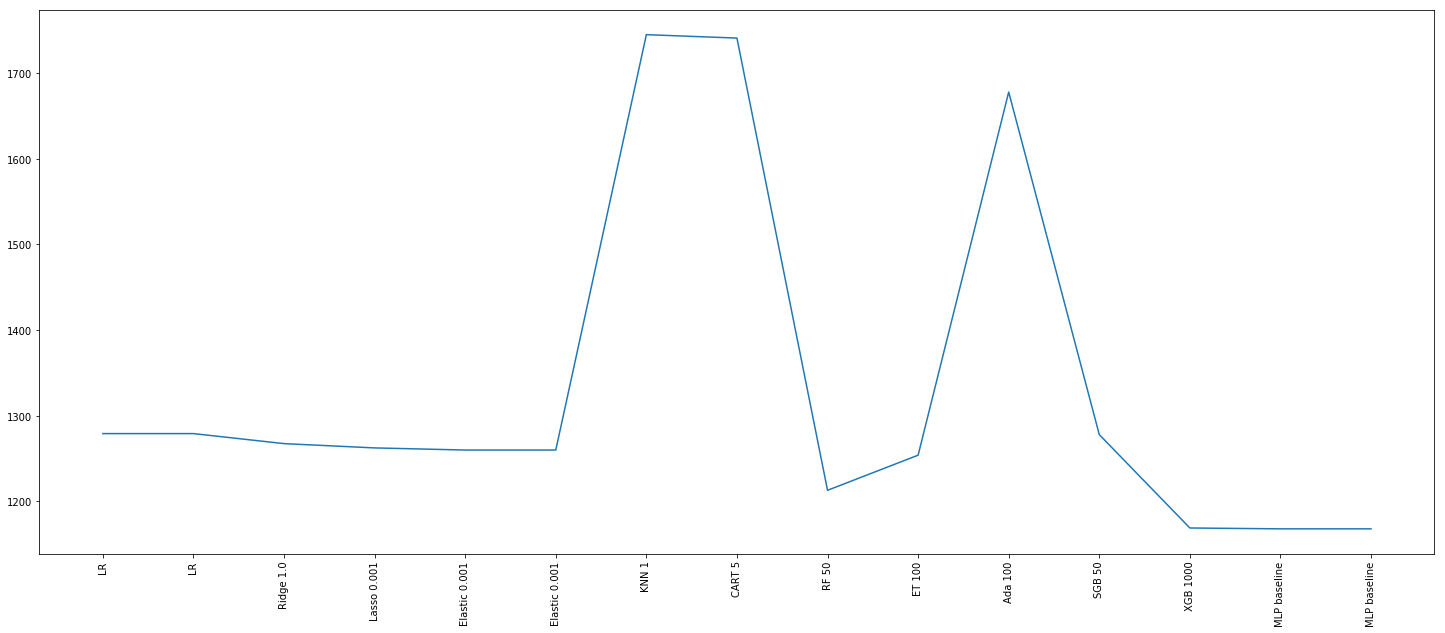

In [36]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

# define baseline model
def baseline(v):
     # create model
     model = Sequential()
     model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     # Compile model
     model.compile(loss='mean_absolute_error', optimizer='adam')
     return model

# define smaller model
def smaller(v):
     # create model
     model = Sequential()
     model.add(Dense(v*(c-1)/2, input_dim=v*(c-1), init='normal', activation='relu'))
     model.add(Dense(1, init='normal', activation='relu'))
     # Compile model
     model.compile(loss='mean_absolute_error', optimizer='adam')
     return model

# define deeper model
def deeper(v):
 # create model
 model = Sequential()
 model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
 model.add(Dense(v*(c-1)/2, init='normal', activation='relu'))
 model.add(Dense(1, init='normal', activation='relu'))
 # Compile model
 model.compile(loss='mean_absolute_error', optimizer='adam')
 return model

# Optimize using dropout and decay
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

def dropout(v):
    #create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(v*(c-1)/2, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='relu'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.9,decay=0.0,nesterov=False)
    model.compile(loss='mean_absolute_error', optimizer=sgd)
    return model

# define decay model
def decay(v):
    # create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='relu'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.8,decay=0.01,nesterov=False)
    model.compile(loss='mean_absolute_error', optimizer=sgd)
    return model

est_list = []
#uncomment the below if you want to run the algo
#est_list = [('MLP',baseline),('smaller',smaller),('deeper',deeper),('dropout',dropout),('decay',decay)]

for name, est in est_list:
 
    algo = name

    #Accuracy of the model using all features
    for m,i_cols_list in X_all:
        model = KerasRegressor(build_fn=est, v=1, nb_epoch=10, verbose=0)
        model.fit(X_train[:,i_cols_list],Y_train)
        result = mean_absolute_error(numpy.expm1(Y_val), numpy.expm1(model.predict(X_val[:,i_cols_list])))
        mae.append(result)
        print(name + " %s" % result)
        
    comb.append(algo )
if (len(est_list)==0):
    mae.append(1168)
    comb.append("MLP" + " baseline" ) 

##Set figure size
#plt.rc("figure", figsize=(25, 10))

#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    


In [37]:
X = numpy.concatenate((X_train,X_val),axis=0)
del X_train
del X_val
Y = numpy.concatenate((Y_train,Y_val),axis=0)
del Y_train
del Y_val

n_estimators = 1000

#Best model definition
best_model = XGBRegressor(n_estimators=n_estimators,seed=seed)
best_model.fit(X,Y)
del X
del Y
#Read test dataset
dataset_test = pandas.read_csv("data/test.csv")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

del cats

#Concatenate encoded attributes with continuous attributes
X_test = numpy.concatenate((encoded_cats,dataset_test.iloc[:,split:].values),axis=1)

del encoded_cats
del dataset_test

#Make predictions using the best model
predictions = numpy.expm1(best_model.predict(X_test))
del X_test
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))

print("Done!")

KeyboardInterrupt: 